# Installing Libraries

In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import cv2
import imutils
import pytesseract
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Displaying Reference and Flipped Frames  

In [ ]:
# Reference and Flipped Frames
def get_ref_frames(video_file, start_frame, end_frame):
  # Open the video file.
  cap = cv2.VideoCapture(video_file)

  frame_number = 0 # Frame Number
  flipped_frames = []
  frames = []

  if not cap.isOpened():
        print("Error: Could not open video file")
        return

    # Read frames until the video is completed or reaches the end_frame
  while cap.isOpened() and frame_number <= end_frame:
      ret, frame = cap.read()

      if ret:
          # Check if the frame is within the specified range
          if start_frame <= frame_number <= end_frame:

              # Resize the frame
              frames.append(frame)
              flipped_frames.append(imutils.rotate(frame,180))


      else:
          break

      frame_number += 1  # Increment frame number

  # Release the video capture object
  cap.release()

  return frames,flipped_frames

# Specify the path to the video file
video_file = "k.mp4"

# Specify the frame ranges
first_frame_range = (0, 63)
second_frame_range = (64, 129)

ref_first_image,first_flip = get_ref_frames(video_file, *first_frame_range)
ref_second_image,second_flip = get_ref_frames(video_file, *second_frame_range)

In [ ]:
# Importing OpenCV
import cv2

# Reading the video from the webcam
video = cv2.VideoCapture("k.mp4")

# Checking whether the camera has been accessed using the isOpened function
if (video.isOpened() == False):
    print("Error opening the video file")

# Getting the frame width and frame height
frame_width = int(video.get(3))
frame_height = int(video.get(4))

# Writing the video using the cv2.VideoWriter function
video_out = cv2.VideoWriter('k_flipp.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))

# When the video has been opened successfully, we'll read each frame of the video using a loop
while(video.isOpened()):
    ret, frame = video.read()
    print(ret)
    if ret == True:

        # Writing each frame of the video
        video_out.write(imutils.rotate(frame,180))

    else:
      break
video.release()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False


64


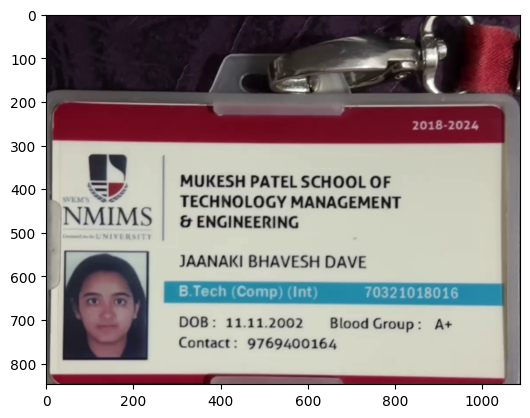

In [ ]:
plt.imshow(cv2.cvtColor(ref_first_image[0], cv2.COLOR_BGR2RGB))

66


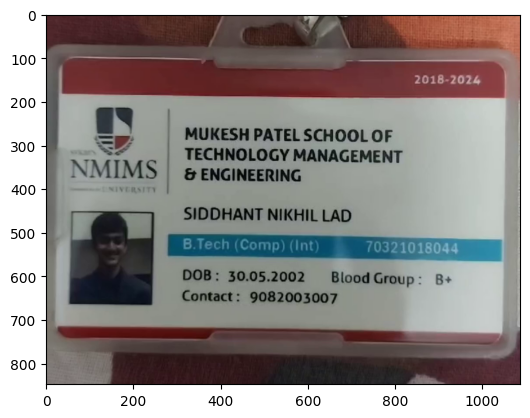

In [ ]:
plt.imshow(cv2.cvtColor(ref_second_image[0], cv2.COLOR_BGR2RGB))

64


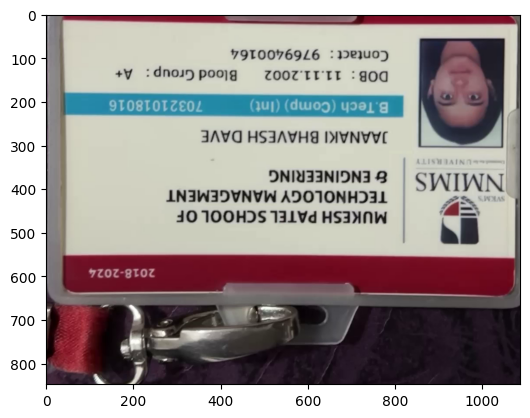

In [ ]:
plt.imshow(cv2.cvtColor(first_flip[0], cv2.COLOR_BGR2RGB))

66


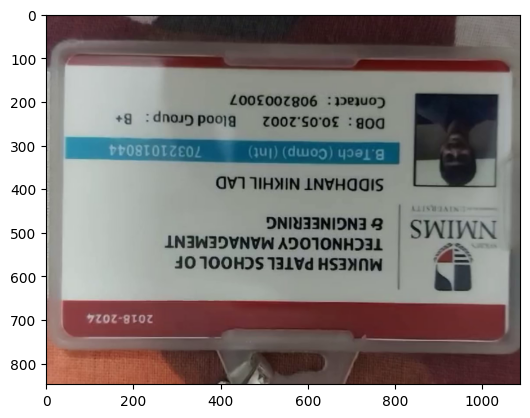

In [ ]:
plt.imshow(cv2.cvtColor(second_flip[0], cv2.COLOR_BGR2RGB))

In [ ]:
# Displays the total number of frames that were successfully read from the video file 'traffic.mp4'.
# i.e represents the length of the frames list, which contains each individual frame captured from the video.
# print(plt.imshow(cv2.cvtColor(ref_first_image[0], cv2.COLOR_BGR2RGB))
print(len(ref_first_image))
print(len(ref_second_image))
print(len(first_flip))
print(len(second_flip))

64
66
64
66


In [ ]:
# Represents the height, width and number of channels of the frame.
ref_first_image[0].shape

(848, 1088, 3)


# Video Processing and Text Extraction with Speific Information


Video processing script using OpenCV and Tesseract OCR to extract text from specified frame ranges of a video file, then analyze and display the most common text results for each range.

Enhanced script for text extraction from video frames, including parsing and extracting specific information like date of birth, contact information, and name from the extracted text. The script iterates over specified frame ranges, extracts text, identifies the most common result, and then further processes it to extract relevant information such as name, date of birth, and contact information.

In [ ]:
cap = cv2.VideoCapture('k.mp4')
# Initializing an empty list `frames[]` to store the frames.
frames=[]
# Initializing a variable `frame_count` to count the number of frames.
frame_count = 0
while True:
# Read a frame from the video
  ret,frame = cap.read()
# If a frame is successfully read, append it to the `frames` list and increment the `frame_count`
  if frame is not None:
    frames.append(frame)
    frame_count = frame_count+1
# If no frame is read (end of video), break out of the loop.
  else:
    break

In [ ]:
# Initializing a video capture object to read from a file from the first cell back again
cap = cv2.VideoCapture('k.mp4')
# G]etting the tracked object
frames_c = []
for i in range(1,frame_count):
# Defining the Region of Interest in the frame
  ret,frame = cap.read()
# Create a mask to isolate the ROI based on a specified and a particular area of the HSV range for the car image.
  x,y,w,h = 300,500,1200,300
  track_window = (x,y,w,h)
  roi = frame[y:y+h,x:x+w]
# Convert the ROI from BGR to HSV color space by extracting only that part of the frame
# hsv = 3 channels are independent from each other i.e hue, saturation and value; hue is represented by an angle hence it is from 0 to 180 degree and the rest is from 0 to 255
  hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
# Mask is also the same as the ROI image
  mask = cv2.inRange(hsv_roi,np.array((0.,60.,32)),np.array((180.,255,255)))
# 0th channel = hue channel ; mask is non zero so is determined accordingly = 180 bins of range from 0 to 179
  roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
# Nnormalizing the histogram i.e dividing the histogram by the maximum value = probability to make it uniform
# Changing the frames also into hsv format after reading each frame at a time
  cv2.normalize = (roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
# Crit moves where there is large intensity using the Mean Shift Algorithm (iterartive algorithm and boundary = 10)
  crit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
# Convert the entire frame to HSV color space.
  hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
# Calculates the back projection of the histogram onto the frame.
# Method used for mapping roi_histogram with different patches of histogram of the image to see if it matches to give a high intensity
  dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
 # New rectangle which will track the object
  ret,track_window = cv2.meanShift(dst,track_window,crit)
  x,y,w,h = track_window
# Store the modified frame in a list for further processing.
  img = cv2.rectangle(frame,(x+40,y-150),(x+w,y+h),255,2)
  frames_c.append(img)

Text(0.5, 1.0, 'Bounding Rectangle for Frame 10')

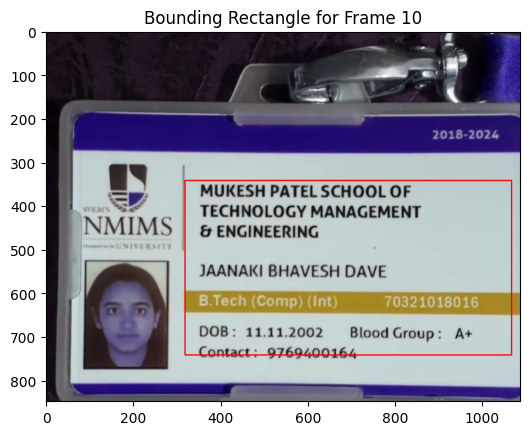

In [ ]:
plt.imshow(frames_c[10])
plt.title('Bounding Rectangle for Frame 10')

In [ ]:
# Initializing a video capture object to read from a file from the first cell back again
cap = cv2.VideoCapture('k.mp4')
# G]etting the tracked object
frames_c = []
for i in range(1,frame_count):
# Defining the Region of Interest in the frame
  ret,frame = cap.read()
# Create a mask to isolate the ROI based on a specified and a particular area of the HSV range for the car image.
  x,y,w,h = 300,500,800,250
  track_window = (x,y,w,h)
  roi = frame[y:y+h,x:x+w]
# Convert the ROI from BGR to HSV color space by extracting only that part of the frame
# hsv = 3 channels are independent from each other i.e hue, saturation and value; hue is represented by an angle hence it is from 0 to 180 degree and the rest is from 0 to 255
  hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
# Mask is also the same as the ROI image
  mask = cv2.inRange(hsv_roi,np.array((0.,60.,32)),np.array((180.,255,255)))
# 0th channel = hue channel ; mask is non zero so is determined accordingly = 180 bins of range from 0 to 179
  roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
# Nnormalizing the histogram i.e dividing the histogram by the maximum value = probability to make it uniform
# Changing the frames also into hsv format after reading each frame at a time
  cv2.normalize = (roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
# Crit moves where there is large intensity using the Mean Shift Algorithm (iterartive algorithm and boundary = 10)
  crit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
# Convert the entire frame to HSV color space.
  hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
# Calculates the back projection of the histogram onto the frame.
# Method used for mapping roi_histogram with different patches of histogram of the image to see if it matches to give a high intensity
  dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
 # New rectangle which will track the object
  ret,track_window = cv2.meanShift(dst,track_window,crit)
  x,y,w,h = track_window
# Store the modified frame in a list for further processing.
  img = cv2.rectangle(frame,(x+40,y-150),(x+w,y+h),255,2)
  frames_c.append(img)

Text(0.5, 1.0, 'Bounding Rectangle for Frame 80')

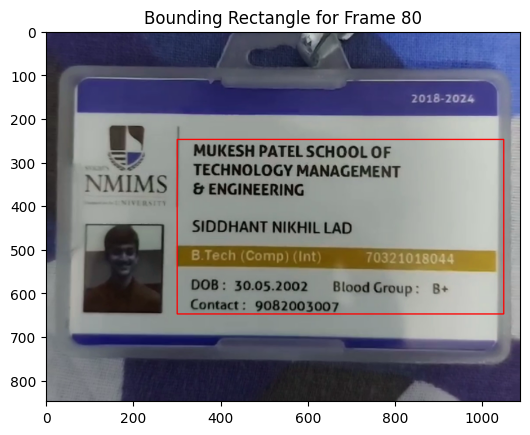

In [ ]:
plt.imshow(frames_c[80])
plt.title('Bounding Rectangle for Frame 80')

In [ ]:
def extract_info_from_video(video_file, start_frame, end_frame):
    # Open the video file
    cap = cv2.VideoCapture(video_file)

    extracted_results = []  # Use a list to store extracted text

    frame_number = 0  # Initialize frame number
    # Check if the video file is opened successfully
    if not cap.isOpened():
        print("Error: Could not open video file")
        return

    # Read frames until the video is completed or reaches the end_frame
    while cap.isOpened() and frame_number <= end_frame:
        ret, frame = cap.read()

        if ret:
            # Check if the frame is within the specified range
            if start_frame <= frame_number <= end_frame:
                # Resize the frame
                frame = imutils.resize(frame, width=2000)

                # image_rotated = cv2.rotate(frame, cv2.ROTATE_180)
                image_rotated = imutils.rotate(frame, 180)

                # Extract text from the frame
                text = pytesseract.image_to_string(image_rotated)

                # Append extracted text to the results list
                extracted_results.append(text)

        else:
            break

        frame_number += 1  # Increment frame number

    # Release the video capture object
    cap.release()

    return extracted_results

# Specify the path to the video file
video_file = "k_flipp.avi"

# Specify the frame ranges
first_frame_range = (0, 62)
second_frame_range = (63, 129)

# Extract information from the video file for the first frame range
results_first_range = extract_info_from_video(video_file, *first_frame_range)

# Extract information from the video file for the second frame range
results_second_range = extract_info_from_video(video_file, *second_frame_range)

# Count the frequency of each extracted result for the first frame range
first_range_counts = Counter(results_first_range)

# Find the most common result for the first frame range
most_common_result_first_range = first_range_counts.most_common(1)[0][0]

# Count the frequency of each extracted result for the second frame range
second_range_counts = Counter(results_second_range)

# Find the most common result for the second frame range
most_common_result_second_range = second_range_counts.most_common(1)[0][0]

# Print the most common results for both frame ranges
print("Most common result for frames {}-{}: {}".format(*first_frame_range, most_common_result_first_range))
print("Most common result for frames {}-{}: {}".format(*second_frame_range, most_common_result_second_range))

Most common result for frames 0-62: MUKESH PATEL SCHOOL OF
TECHNOLOGY MANAGEMENT
& ENGINEERING

JAANAKI BHAVESH DAVE

DOB: 11.11.2002 Blood Group: A+
Contact: 9769400164

 

Most common result for frames 63-129:  

    
 

MUKESH PATEL SCHOOL OF
TECHNOLOGY MANAGEMENT
& ENGINEERING

SIDDHANT NIKHIL LAD

DOB: 30.05.2002 BloodGroup: 8+
Contact: 9082003007

 

 

 



In [ ]:
import re

def extract_info_from_text(text):
    # Extract Date of Birth (DOB)
    dob_match = re.search(r'\b\d{2}\.\d{2}\.\d{4}\b', text)
    dob_info = dob_match.group() if dob_match else None

    # Extract contact information
    contact_match = re.search(r'Contact: (\d{10})', text)
    contact_info = contact_match.group(1) if contact_match else None

    # Extract the line with exactly three words
    lines = text.split('\n')
    name = next((line for line in lines if len(line.split()) == 3), None)

    return dob_info, contact_info, name

# Specify the path to the video file
video_file = "k_flipp.avi"

# Specify the frame ranges
frame_ranges = [(0, 62), (63, 141)]

for i, frame_range in enumerate(frame_ranges):
    # Extract information from the video file for the current frame range
    results_range = extract_info_from_video(video_file, *frame_range)

    # Count the frequency of each extracted result for the current frame range
    range_counts = Counter(results_range)

    # Find the most common result for the current frame range
    most_common_result_range = range_counts.most_common(1)[0][0]

    # Extract information from the most common result
    dob_info, contact_info, name = extract_info_from_text(most_common_result_range)

    # Print the extracted information for the current frame range
    print(f"Information for frames {frame_range[0]}-{frame_range[1]}:")
    print("Extracted Name:", name)
    print("Extracted Date of Birth:", dob_info)
    print("Extracted Contact Information:", contact_info)
    print()

Information for frames 0-62:
Extracted Name: JAANAKI BHAVESH DAVE
Extracted Date of Birth: 11.11.2002
Extracted Contact Information: 9769400164

Information for frames 63-141:
Extracted Name: SIDDHANT NIKHIL LAD
Extracted Date of Birth: 30.05.2002
Extracted Contact Information: 9082003007



# Extra

In [ ]:
def extract_info_from_video(video_file, start_frame, end_frame):
    # Open the video file
    cap = cv2.VideoCapture(video_file)

    extracted_results = []  # Use a list to store extracted text

    frame_number = 0  # Initialize frame number
    # Check if the video file is opened successfully
    if not cap.isOpened():
        print("Error: Could not open video file")
        return

    # Read frames until the video is completed or reaches the end_frame
    while cap.isOpened() and frame_number <= end_frame:
        ret, frame = cap.read()

        if ret:
            # Check if the frame is within the specified range
            if start_frame <= frame_number <= end_frame:
                # Resize the frame
                frame = imutils.resize(frame, width=500)

                # image_rotated = cv2.rotate(frame, cv2.ROTATE_180)
                image_rotated = imutils.rotate(frame, 180)

                # Extract text from the frame
                text = pytesseract.image_to_string(image_rotated)

                # Append extracted text to the results list
                extracted_results.append(text)

        else:
            break

        frame_number += 1  # Increment frame number

    # Release the video capture object
    cap.release()

    return extracted_results

# Specify the path to the video file
video_file = "k_flipp.avi"

# Specify the frame ranges
first_frame_range = (0, 62)
second_frame_range = (63, 129)

# Extract information from the video file for the first frame range
results_first_range = extract_info_from_video(video_file, *first_frame_range)

# Extract information from the video file for the second frame range
results_second_range = extract_info_from_video(video_file, *second_frame_range)

# Count the frequency of each extracted result for the first frame range
first_range_counts = Counter(results_first_range)

# Find the most common result for the first frame range
most_common_result_first_range = first_range_counts.most_common(1)[0][0]

# Count the frequency of each extracted result for the second frame range
second_range_counts = Counter(results_second_range)

# Find the most common result for the second frame range
most_common_result_second_range = second_range_counts.most_common(1)[0][0]

# Print the most common results for both frame ranges
print("Most common result for frames {}-{}: {}".format(*first_frame_range, most_common_result_first_range))
print("Most common result for frames {}-{}: {}".format(*second_frame_range, most_common_result_second_range))

Most common result for frames 0-62: MUKESH PATEL SCHOOL OF
TECHNOLOGY MANAGEMENT
& ENGINEERING

JAANAKI BHAVESH DAVE

DOB: 11.11.2002 BloodGroup: A+
Contact: 9769400164

 

Most common result for frames 63-129:       
  
   

MUKESH PATEL SCHOOL OF

TECHNOLOGY MANAGEMENT
N MIMS | & ENGINEERING

SIDDHANT NIKHIL LAD.

DOB: 30.05.2002 BloodGroup: 8+
Contact: 9082003007



# Displaying the Output Frame

Display frames from specified frame numbers in the video file 'k.mp4', extract text from each frame, and print the extracted information such as name, date of birth, and contact information. The frames are displayed using matplotlib for visualization.

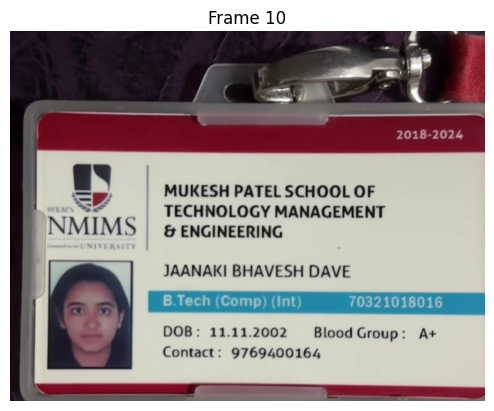

Information extracted from Frame 10:
Extracted Name: yieb i: tyler’
Extracted Date of Birth: 11.11.2002
Extracted Contact Information: 9769400164



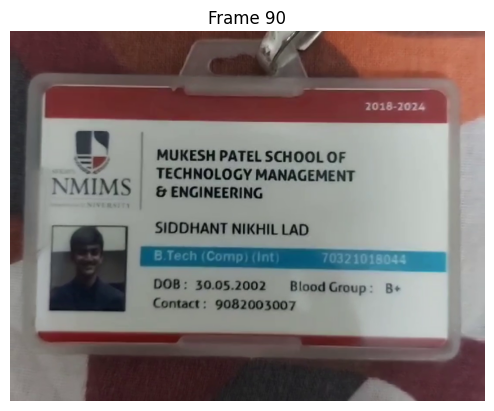

Information extracted from Frame 90:
Extracted Name: SIDDHANT NIKHIL LAD
Extracted Date of Birth: 30.05.2002
Extracted Contact Information: 9082003007



In [ ]:
import cv2
import matplotlib.pyplot as plt

# List of frame numbers to display
frame_numbers = [10, 90]

# Open the video file
cap = cv2.VideoCapture('k.mp4')

# Iterate over each frame number
for frame_number in frame_numbers:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    ret, frame = cap.read()

    if ret:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Turn off axis labels
        plt.title(f"Frame {frame_number}")
        plt.show()

        # Extract information from the displayed frame
        text = pytesseract.image_to_string(frame)
        dob_info, contact_info, name = extract_info_from_text(text)

        # Print extracted information
        print(f"Information extracted from Frame {frame_number}:")
        print("Extracted Name:", name)
        print("Extracted Date of Birth:", dob_info)
        print("Extracted Contact Information:", contact_info)
        print()
    else:
        print(f"Error: Failed to read frame {frame_number} from video")

# Release the video capture object
cap.release()